In [8]:
import sys
sys.path.append("../..")
from pathlib import Path
import numpy as np
import xarray
import matplotlib.pyplot as plt
from plot_utils import set_size, tex_fonts, LINEWIDTH_L_CSS as linewidth

In [9]:
plt.rcParams.update(tex_fonts) # use latex fonts
plt.rcParams.update({"axes.grid": True}) 

In [10]:
fit_mean_all = xarray.load_dataarray("fit_mean_all.nc")
FIT_THRESHOLD = 83.25865396027804*0.99

In [11]:
modes, truncation_method, runs = fit_mean_all.indexes.values()
modes = modes
modes_deleted = modes[0] - modes

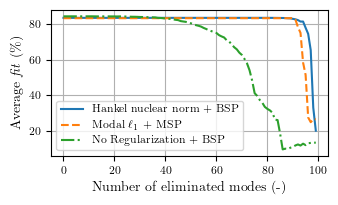

In [15]:
#fig, ax = plt.subplots()
fig, ax = plt.subplots(1, 1, figsize=set_size(linewidth, fraction=1.0))
#ax.plot(modes, fit_mean_all.loc["ckpt_large_no_reg", "balanced_truncation"])
ax.plot(modes_deleted, fit_mean_all.loc["ckpt_large_reg_hankel", "balanced_singular_perturbation"], "-", label="Hankel nuclear norm + BSP")
ax.plot(modes_deleted, fit_mean_all.loc["ckpt_large_reg_modal", "modal_singular_perturbation"], "--", label="Modal $\ell_1$ + MSP")
ax.plot(modes_deleted, fit_mean_all.loc["ckpt_large_no_reg", "balanced_singular_perturbation"], "-.", label="No Regularization + BSP")

#ax.axhline(FIT_THRESHOLD, color="red")
#ax.invert_xaxis()
ax.grid(True)
ax.set_xlabel("Number of eliminated modes (-)")
ax.set_ylabel("Average \emph{fit} (\%)")
ax.legend();
plt.tight_layout()
plt.savefig(Path("fig")/ "MOR_regularization.pdf") # .png", dpi=300)
plt.savefig(Path("fig")/ "MOR_regularization.png", dpi=300)

In [13]:
min_order = xarray.DataArray(coords=(runs, truncation_method))
for run in fit_mean_all.coords["run"]:
    for method in fit_mean_all.coords["truncation_method"]:
        fit_seq = fit_mean_all.loc[run, method]
        min_order.loc[run, method] = np.min(fit_seq[fit_seq >= FIT_THRESHOLD].modes)
min_order

<xarray.DataArray (run: 3, truncation_method: 4)>
array([[ 72.,  57.,  97.,  65.],
       [ 44.,  27., 100.,   9.],
       [ 11.,   9.,  82.,  24.]])
Coordinates:
  * run                (run) object 'ckpt_large_no_reg' ... 'ckpt_large_reg_h...
  * truncation_method  (truncation_method) object 'balanced_truncation' ... '...

In [14]:
max_deleted = modes.max() - min_order
max_deleted

<xarray.DataArray (run: 3, truncation_method: 4)>
array([[28., 43.,  3., 35.],
       [56., 73.,  0., 91.],
       [89., 91., 18., 76.]])
Coordinates:
  * run                (run) object 'ckpt_large_no_reg' ... 'ckpt_large_reg_h...
  * truncation_method  (truncation_method) object 'balanced_truncation' ... '...